# Classifying wine varieties datasets

https://www.kaggle.com/brynja/wineuci

* 이탈리아의 같은 지역에서 재배되는 3개의 품종에서 파생된 와인을 화학적으로 분석한 결과
* feature : 3종류의 와인 각각에서 발견된 성분 13개

* Class 
|Class | 갯수|
|:--------:|:--------:|
|1| 59 |
|2| 71 |
|3| 48 |

In [6]:
# 관련 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from itertools import count
%matplotlib inline

# 데이터 불러오기
# wine = pd.read_csv('./python_ML/Wine.csv') #injun
wine = pd.read_csv('./Wine.csv') #mink

# 데이터의 컬럼명 지정
wine.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [7]:
wine

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 결측치 및 데이터 확인

In [8]:
wine.info() # 결측치 없음, 모두 숫자형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


### 피처와 레이블 분리

In [9]:
X_feature = wine.drop('name', axis = 1)
y_label = wine['name']

### 데이터 세트 분리 : 학습 / 예측

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.3, random_state=0) # test_size 기본값 : 0.25

In [11]:
print(X_train.shape)
print(X_test.shape)

(123, 13)
(54, 13)


### 알고리즘 모델 생성 및 정확도 비교 : 알고리즘 튜닝 전

In [12]:
# 알고리즘 객체 생성 : DecisionTree, RandomForest
dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)

# 알고리즘 객체 데이터 학습
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# 학습한 알고리즘 객체의 예측 수행
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

# 예측성능 평가 : 정확도 평가
print('## 정확도 평가 ##')
print('DecisionTreeClassifier:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('RandomForestClassifier:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 교차 검증 : 예측성능 지표(정확도), 교차검증 세트(5개)
print('\n## 교차검증 _ DecisionTree ##')
scores = cross_val_score(dt_clf, X_feature, y_label, scoring='accuracy', cv=8)
print('DecisionTreeClassifier 검증별 정확도 :', np.round(scores, 4))
print('DecisionTreeClassifier 검증 평균 정확도 :', np.round(np.mean(scores), 4))

print('\n## 교차검증 _ RandomForest ##')
scores = cross_val_score(rf_clf, X_feature, y_label, scoring='accuracy', cv=8)
print('RandomForestClassifier 검증별 정확도 :', np.round(scores, 4))
print('RandomForestClassifier 검증 평균 정확도 :', np.round(np.mean(scores), 4))

## 정확도 평가 ##
DecisionTreeClassifier:0.9259
RandomForestClassifier:0.9815

## 교차검증 _ DecisionTree ##
DecisionTreeClassifier 검증별 정확도 : [0.913  0.7273 0.8636 0.7727 0.9091 0.9545 0.9545 0.7727]
DecisionTreeClassifier 검증 평균 정확도 : 0.8584

## 교차검증 _ RandomForest ##
RandomForestClassifier 검증별 정확도 : [0.9565 0.9545 0.9545 1.     1.     1.     1.     1.    ]
RandomForestClassifier 검증 평균 정확도 : 0.9832


### 피처 중요도 확인 

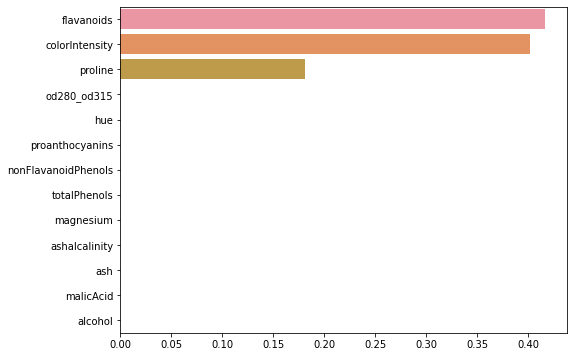

In [13]:
# 피처 중요도 
ftr_importances_values = dt_clf.feature_importances_ # DecisionTreeClassifier의 속성 : feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index = X_feature.columns) 

ftr_order = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_order, y=ftr_order.index)

### EDA : 피처 데이터의 분포 확인
##### 중요도가 높게 나온 피처를 중심으로

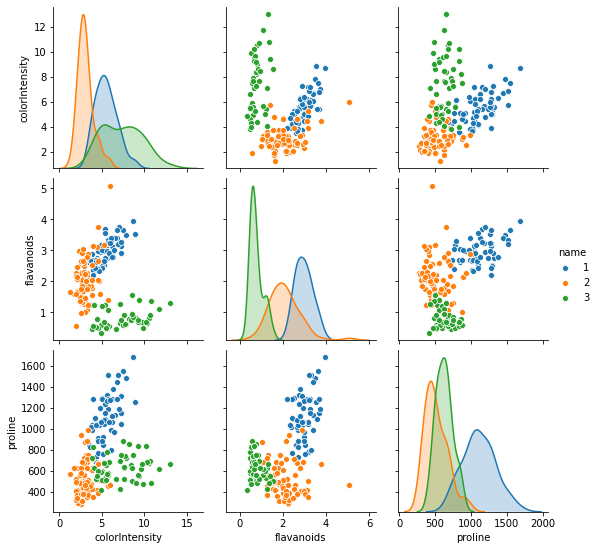

In [14]:
wineSub = wine[['name', 'colorIntensity', 'flavanoids', 'proline']]
sns.pairplot(wineSub,hue='name')

Test Accuracy: 0.92593


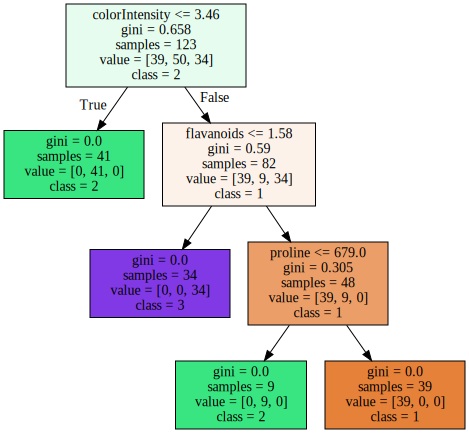

In [16]:
from sklearn.tree import export_graphviz
import graphviz

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
yPredTree = tree.predict(X_test)
score = accuracy_score(y_test, yPredTree)

print("Test Accuracy: %0.5f" % score)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(tree, out_file="./tree.dot", class_names = ['1','2','3'], 
                feature_names = ['alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("./tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 중요도 높은 feature 추출

In [13]:
X3_feature = np.array(wine[['colorIntensity','proline','flavanoids']])
y3_label = np.array(wine['name'])

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_feature, y3_label, test_size=0.3, random_state=0)

print(X3_train.shape)
print(X3_test.shape)

(123, 3)
(54, 3)


In [14]:
# 알고리즘 객체 생성 : DecisionTree, RandomForest
dt_clf3 = DecisionTreeClassifier(random_state=156)
rf_clf3 = RandomForestClassifier(random_state=156)

# 알고리즘 객체 데이터 학습
dt_clf3.fit(X3_train, y3_train)
rf_clf3.fit(X3_train, y3_train)

# 학습한 알고리즘 객체의 예측 수행
dt_pred3 = dt_clf3.predict(X3_test)
rf_pred3 = rf_clf3.predict(X3_test)

In [15]:
# 예측성능 평가 : 정확도 평가
print('## 정확도 평가 ##')
print('DecisionTreeClassifier:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('RandomForestClassifier:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 교차 검증 : 예측성능 지표(정확도), 교차검증 세트(5개)
print('\n## 교차검증 _ DecisionTree ##')
scores = cross_val_score(dt_clf, X_feature, y_label, scoring='accuracy', cv=8)
print('DecisionTreeClassifier 검증별 정확도 :', np.round(scores, 4))
print('DecisionTreeClassifier 검증 평균 정확도 :', np.round(np.mean(scores), 4))

print('\n## 교차검증 _ RandomForest ##')
scores = cross_val_score(rf_clf, X_feature, y_label, scoring='accuracy', cv=8)
print('RandomForestClassifier 검증별 정확도 :', np.round(scores, 4))
print('RandomForestClassifier 검증 평균 정확도 :', np.round(np.mean(scores), 4))
print('\n ----------- feature 추출 후 --------------- \n')

# 예측성능 평가 : 정확도 평가
print('## 정확도 평가 ##')
print('DecisionTreeClassifier:{0:.4f}'.format(accuracy_score(y3_test, dt_pred3)))
print('RandomForestClassifier:{0:.4f}'.format(accuracy_score(y3_test, rf_pred3)))

# 교차 검증 : 예측성능 지표(정확도), 교차검증 세트(5개)
print('\n## 교차검증 _ DecisionTree ##')
scores3 = cross_val_score(dt_clf3, X3_feature, y3_label, scoring='accuracy', cv=8)
print('DecisionTreeClassifier 검증별 정확도 :', np.round(scores3, 4))
print('DecisionTreeClassifier 검증 평균 정확도 :', np.round(np.mean(scores3), 4))

## 정확도 평가 ##
DecisionTreeClassifier:0.9259
RandomForestClassifier:0.9815

## 교차검증 _ DecisionTree ##
DecisionTreeClassifier 검증별 정확도 : [0.913  0.7273 0.8636 0.7727 0.9091 0.9545 0.9545 0.7727]
DecisionTreeClassifier 검증 평균 정확도 : 0.8584

## 교차검증 _ RandomForest ##
RandomForestClassifier 검증별 정확도 : [0.9565 0.9545 0.9545 1.     1.     1.     1.     1.    ]
RandomForestClassifier 검증 평균 정확도 : 0.9832

 ----------- feature 추출 후 --------------- 

## 정확도 평가 ##
DecisionTreeClassifier:0.9259
RandomForestClassifier:0.9630

## 교차검증 _ DecisionTree ##
DecisionTreeClassifier 검증별 정확도 : [0.913  0.7727 0.9091 0.7727 1.     0.9545 1.     1.    ]
DecisionTreeClassifier 검증 평균 정확도 : 0.9153

## 교차검증 _ RandomForest ##
RandomForestClassifier 검증별 정확도 : [0.913  0.9545 0.9545 0.7727 1.     0.9545 1.     1.    ]
RandomForestClassifier 검증 평균 정확도 : 0.9437


### DecisionTree 최적 하이퍼 파라미터 검색(전체데이터) : GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[4,8], # 단독일 때 영향 X
          'min_samples_split' : [4, 8, 12],  #단독일 때 영향 X
          'max_leaf_nodes' : [4,8, 12], # 단독일 때 8 이상이면 굿
          'min_samples_leaf' : [4,8,12], # 단독일 때 작을수록 굿
         }

dtree = DecisionTreeClassifier()
grid_dtree = GridSearchCV(dt_clf, param_grid=params, cv=8, refit=True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
1,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
2,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
3,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
4,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
5,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375
6,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.919792,37,0.8125,0.9375,0.8750
7,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.919792,37,0.8125,0.9375,0.8750
8,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",0.919792,37,0.8125,0.9375,0.8750
9,"{'max_depth': 4, 'max_leaf_nodes': 8, 'min_sam...",0.967708,1,1.0000,0.9375,0.9375


### Hyperparameter 확인
|<center>메인 parameter</center> | <center>추가 parameter</center>|<center>영향</center>|<center>최대 정확도</center>|
|:--------:|:--------|:--------|:--------:|
|max_depth| <center>영향 X</center> ||0.959707|
|max_depth| max_leaf_nodes | *max_leaf_nodes* : 8 이상 |0.959707|
|max_depth| min_samples_leaf| *min_samples_leaf* : 4 이하 |0.959707|
|max_depth | min_samples_split | 영향 X |0.959707|
|max_leaf_nodes | <center>영향 X </center>||0.959707|
|max_leaf_nodes| min_samples_leaf | *max_leaf_nodes* : 12, *min_samples_leaf* : 4 |0.959707|
|max_leaf_nodes| min_samples_split | *max_leaf_nodes* : 8 이상 |0.959707|
|min_samples_leaf| 8 이상 ||0.959707	|
|min_samples_leaf| min_samples_split | *min_samples_leaf* : 4 이하, *min_samples_split* : 4 이하 |0.959707|
|min_samples_split|<center> 작을수록</center> ||0.959707|
| max_depth| max_leaf_nodes + min_samples_leaf | *max_depth* : 4 이하, *max_leaf_nodes* : 12 이상,  *min_samples_leaf* : 4|0.959707|
| max_depth| max_leaf_nodes + min_samples_split |  *max_depth* : 4 이상, *max_leaf_nodes* : 8 이상 |0.959707|
|max_depth | min_samples_leaf + min_samples_split | *min_samples_leaf* : 2, *min_samples_split* : 4 |0.967643|
| max_leaf_nodes| min_samples_leaf + min_samples_split | *max_leaf_nodes*: 8 이상, *min_samples_leaf* : 4 이하  |0.959707|
|max_depth| max_leaf_nodes + min_samples_leaf + min_samples_split | *max_leaf_nodes* : 8 이상, *min_samples_leaf* : 4,  *min_samples_split* :  4~8 | 0.959707	|

#####  DecisioinTree 최적 파라미터값 확인 

In [17]:
print('GridSearchcCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchcCV 최적 파라미터 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchcCV 최적 파라미터: {'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}
GridSearchcCV 최적 파라미터 정확도:0.9677


### RandomForest 최적 하이퍼 파라미터 검색(전체데이터) : GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 200], 
          'min_samples_split' : [2, 4, 8, 12],  
          'max_leaf_nodes' : [2, 4,8, 12], 
          'min_samples_leaf' : [2, 4,8,12], 
         }

# rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=8, n_jobs=-1)

grid_rf.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_leaf_nodes': 2, 'min_samples_leaf': 2, '...",0.942187,113
1,"{'max_leaf_nodes': 2, 'min_samples_leaf': 2, '...",0.958854,61
2,"{'max_leaf_nodes': 2, 'min_samples_leaf': 2, '...",0.942187,113
3,"{'max_leaf_nodes': 2, 'min_samples_leaf': 2, '...",0.958854,61
4,"{'max_leaf_nodes': 2, 'min_samples_leaf': 2, '...",0.942187,113
...,...,...,...
123,"{'max_leaf_nodes': 12, 'min_samples_leaf': 12,...",0.958854,61
124,"{'max_leaf_nodes': 12, 'min_samples_leaf': 12,...",0.950521,101
125,"{'max_leaf_nodes': 12, 'min_samples_leaf': 12,...",0.958854,61
126,"{'max_leaf_nodes': 12, 'min_samples_leaf': 12,...",0.950521,101


##### RandomForest 최적 하이퍼 파라미터 확인

In [19]:
print('GridSearchcCV 최적 파라미터:', grid_rf.best_params_)
print('GridSearchcCV 최적 파라미터 정확도:{0:.4f}'.format(grid_rf.best_score_))

GridSearchcCV 최적 파라미터: {'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
GridSearchcCV 최적 파라미터 정확도:0.9755


## 전체 데이터셋일 때 최적 파라미터
DT 최적 파라미터: {'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}  
DT 최적 파라미터 정확도:0.9677  

RF 최적 파라미터: {'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}  
RF 최적 파라미터 정확도:0.9755  

### feature추출 후 : DecisionTree 최적 파라미터 확인 및 예측성능 평가

In [23]:
params = {'max_depth':[4,8],
          'min_samples_split' : [4, 8, 12],  
          'max_leaf_nodes' : [4,8, 12],
          'min_samples_leaf' : [4,8,12]
         }

grid_dtree3 = GridSearchCV(dt_clf3, param_grid=params, cv=8, refit=True)
grid_dtree3.fit(X3_train, y3_train)

print('DecisionTree GridSearchcCV 최적 파라미터:', grid_dtree3.best_params_)
print('DecisionTree GridSearchcCV 최적 파라미터 정확도:{0:.4f}'.format(grid_dtree3.best_score_))

DecisionTree GridSearchcCV 최적 파라미터: {'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}
DecisionTree GridSearchcCV 최적 파라미터 정확도:0.9677


### feature추출 후 : RandomForest 최적 파라미터 확인 및 예측성능 평가

In [21]:
params = {'n_estimators':[100, 200], 
          'min_samples_split' : [2, 4, 8, 12],  
          'max_leaf_nodes' : [2, 4,8, 12], 
          'min_samples_leaf' : [2, 4,8,12]
         }

grid_rf3 = GridSearchCV(rf_clf3, param_grid=params, cv=8, n_jobs=-1)
grid_rf3.fit(X3_train, y3_train)

print('RandomForest GridSearchcCV 최적 파라미터:', grid_rf3.best_params_)
print('RandomForest GridSearchcCV 최적 파라미터 정확도:{0:.4f}'.format(grid_rf3.best_score_))

RandomForest GridSearchcCV 최적 파라미터: {'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
RandomForest GridSearchcCV 최적 파라미터 정확도:0.9839


### 예측성능 종합 비교 : DecisioinTree / RandomForest 

In [22]:
print('## 정확도 비교 ##')
print('DecisionTreeClassifier')
print('피처 추출 전 / 알고리즘 튜닝 전:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('피처 추출 후 / 알고리즘 튜닝 전:{0:.4f}'.format(accuracy_score(y3_test, dt_pred3)))
print('피처 추출 전 / 알고리즘 튜닝 후:{0:.4f}'.format(grid_dtree.best_score_))
print('피처 추출 후 / 알고리즘 튜닝 후:{0:.4f}'.format(grid_dtree3.best_score_))

print('\n-------------------------------------------------\n')

print('RandomForestClassifier')
print('피처 추출 전 / 알고리즘 튜닝 전:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('피처 추출 후 / 알고리즘 튜닝 전:{0:.4f}'.format(accuracy_score(y3_test, rf_pred3)))
print('피처 추출 전 / 알고리즘 튜닝 후:{0:.4f}'.format(grid_rf.best_score_))
print('피처 추출 후 / 알고리즘 튜닝 후:{0:.4f}'.format(grid_rf3.best_score_))

## 정확도 비교 ##
DecisionTreeClassifier
피처 추출 전 / 알고리즘 튜닝 전:0.9259
피처 추출 후 / 알고리즘 튜닝 전:0.9259
피처 추출 전 / 알고리즘 튜닝 후:0.9677
피처 추출 후 / 알고리즘 튜닝 후:0.9677

-------------------------------------------------

RandomForestClassifier
피처 추출 전 / 알고리즘 튜닝 전:0.9815
피처 추출 후 / 알고리즘 튜닝 전:0.9630
피처 추출 전 / 알고리즘 튜닝 후:0.9755
피처 추출 후 / 알고리즘 튜닝 후:0.9839


# AdaBoost Ensemble

In [19]:
#Using AdaBoost ensemble
ada = AdaBoostClassifier(base_estimator=tree
                         ,n_estimators=500
                         ,learning_rate=0.1
                         ,random_state=156)
ada.fit(X_train, y_train)
yPredAda = ada.predict(X_test)

score = accuracy_score(y_test, yPredAda)

print("Test Accuracy: %0.5f" % score)

Test Accuracy: 0.92593


## AdaBoost Ensemble - Cross Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
# Cross validate the Bag
cv_results = cross_val_score(ada, X_feature, y_label, cv=8, scoring='accuracy')
print('Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

kfold = KFold(n_splits=8, random_state=156, shuffle = True)
cv_results = cross_val_score(ada, X_feature, y_label, cv=kfold, scoring='accuracy')
print('KFold Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

skfold = StratifiedKFold(n_splits=8, random_state=156, shuffle = True)
cv_results = cross_val_score(ada, X_feature, y_label, cv=skfold, scoring='accuracy')
print('StratifiedKFold Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

Cross validated accuracy: 0.85845 +/- 0.09243
KFold Cross validated accuracy: 0.92614 +/- 0.06403
StratifiedKFold Cross validated accuracy: 0.89847 +/- 0.07064


# Logistic Regression

In [21]:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# ‘multinomial’ is unavailable when solver=’liblinear’.
# 'auto' selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
log_clf = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10, random_state=156,
                            C=10, penalty='l2') 
# c : 정규화 정도
# solver : 최적화에 적용할 알고리즘 - 

log_clf.fit(X_train,y_train) 
ypred = log_clf.predict(X_test)
yscore = log_clf.score(X_test, y_test)

print(ypred)
print(yscore)

[1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 2 1 1 1 2
 2 2 2 2 1 2 2 2 2 1 2 1 1 2 2 1 2]
0.6851851851851852


/home/mink/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
